# Round 6. Centrality measures for undirected networks

In this exercise, we get familiar with some common centrality measures by applying them to undirected networks (although these measures can all be generalized also to directed networks).
Below, we list and define the measures used in this exercise:

1. degree $k(i)$: Number of neighbors of node $i$
2. betweenness centrality $bc(i)$: Number of shortest paths between other nodes of the network that pass through node $i$. However, if there exist several shortest paths between a given pair of nodes, then the contribution of that node pair to the betweenness of $i$ is given by the fraction of those paths that contain $i$. The betweenness scores are also normalized by $(N-1)(N-2)$, i.e. the number of all node-pairs of the network, excluding pairs that contain $i$ (because paths starting or ending in node $i$ do not contribute to the betweenness of $i$), which is the maximum possible score. Formally, if $\sigma_{st}$ is the number of shortest paths from $s$ to $t$ and $\sigma_{sit}$ the number of such paths that contain $i$, then $\big[bc(i) = \frac{1}{(N-1)(N-2)}\sum_{s\neq i} \sum_{t\neq i} \dfrac{\sigma_{sit}}{\sigma_{st}}\big]$.
3. closeness centrality $C(i)$: Inverse of the average shortest path distance to all other nodes than $i$: $\bigg[C(i) = \dfrac{N-1}{\sum\limits_{v\neq i}d(i,v)}\bigg]$.
4. $k$-shell $k_s(i)$: Node $i$ belongs to the $k$-shell, if it belongs to the $k$-core of the network but does not belong to the $k+1$-core. The $k$-core is the maximal subnetwork (i.e. the largest possible subset of the network's nodes, and the links between them) where all nodes have at least degree $k$. In other words, the 1-core is formed by removing nodes of degree 0 (isolated nodes) from the network, the 2-core is formed by removing nodes of degree 1 and iteratively removing the nodes that become degree 1 or 0 because of the removal, the 3-core is formed by removing nodes of degree less than 3 and those nodes that become of degree less than 3 because of the removals, and so on. The 1-shell is then the set of nodes that was removed from the 1-core to obtain the 2-core.
5. eigenvector centrality $e(i)$: Eigenvector centrality is a generalization of degree that takes into account the degrees of the node's neighbors, and recursively the degrees of the neighbors of neighbors, and so on. It is defined as the eigenvector of the adjacency matrix that corresponds to the largest eigenvalue.

To get you started, you may use this notebook OR the accompanying Python template `centrality_measures_for_undirected_networks.py` available in MyCourses. Then you only need to fill in the required functions. Some of the functions do NOT need modifications. You may start your solution after the subtitle "**Begin of the Exercise**" down below. 

In addition to returning a short report of your results (including the visualizations), return also your commented Python code or notebook. Remember to label the axes in your figures!

In [1]:
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib import gridspec
import pickle

In [2]:
def create_scatter(x_values, y_values, x_label, y_label, labels, markers):
    """
    Creates a scatter plot of y_values as a function of x_values.

    Parameters
    ----------
    x_values: np.array
    y_values: list of np.arrays
    x_label: string
    y_label: string
        a generic label of the y axis
    labels: list of strings
        labels of scatter plots
    markers: list of strings

    Returns
    -------
    fig: figure object
    """
    assert x_values.size , 'Bad input x_values for creating a scatter plot'

    fig = plt.figure()

    ax = fig.add_subplot(111)

    for y_val, label, marker in zip(y_values, labels, markers):
        ax.plot(x_values, y_val, ls='', marker=marker, label=label)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid()
    ax.legend(loc=0)

    return fig

In [3]:
def visualize_on_network(network, node_values, coords_path,
                         titles, palette='YlOrRd',
                         node_size=50, font_size=8, scale=500):
    """
    Creates visualizations of the network with nodes color coded by each of the
    node values sets.

    Parameters
    ----------
    network: networkx.Graph()
    node_values: list of lists
    coords_path: path to a file containing node coordinates
    titles: list of strings
    palette: string
    node_size: int
    font_size: int
    scale: int
        used to calculate the spring layout for node positions

    Returns
    -------
    fig: figure object
    """
    assert node_values[0].size, "there should be multiple values per node"

    # This is the grid for 5 pictures
    gs = gridspec.GridSpec(3, 4, width_ratios=(20, 1, 20, 1))
    network_gs_indices = [(0, 0), (0, 2), (1, 0), (1, 2), (2,0)]
    cbar_gs_indices = [(0, 1), (0, 3), (1, 1), (1, 3), (2, 1)]

    # Loading coordinates from the file
    with open(coords_path, 'rb') as f:
        #coords = pickle.load(f, encoding='latin1')
        coords = pickle.load(f, encoding='latin1')

    # Loop over different value sets
    fig = plt.figure()
    cmap = plt.get_cmap(palette)
    for node_val, title, network_gs_index, cb_gs_index in zip(node_values,
                                                              titles,
                                                              network_gs_indices,
                                                              cbar_gs_indices):
        # Draw the network figure
        ax = fig.add_subplot(gs[network_gs_index[0], network_gs_index[1]])
        nx.draw(network, pos=coords, ax=ax, node_color=node_val, cmap=cmap,
                node_size=node_size, font_size=font_size, edgecolors='black')
                
                
        # Draw the colorbar
        norm = mpl.colors.Normalize(vmin=np.min(node_val), vmax=np.max(node_val))
        scm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
        plt.colorbar(scm, ax=ax)

        ax.set_title(title)
        
    plt.tight_layout()
    return fig

## Data
Let us load the data from the right folder and assign the names for all the plots we will save. If you run this notebook in your machine, please specify the right folder.

In [4]:
# Select data directory
import os
if os.path.isdir('/coursedata'):
    course_data_dir = '/coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    course_data_dir = 'some_path'
    # YOUR CODE HERE
    #raise NotImplementedError()

print('The data directory is %s' % course_data_dir)

The data directory is /coursedata


# Begin of the exercise
Write your code here to compute the requested network properties

### a. Centrality measures (pen and paper)
Your first task is to compute without a computer the first 4 centrality measures of the above list for the network shown in Fig. 1 (i.e. using pen-and-paper; note that you do not need to compute the eigenvector centrality, as one then would need to compute the eigenvalues of a 5×5 matrix which can be a bit painful). In your computations, use the definitions given above and show also intermediate steps where necessary.

Your first task is to compute the requested centralities **without a computer** for the selected nodes in the network shown in the below figure.  
**i)** Betweenness centrality of node **C** (include the intermediate calculation steps in your report).  
**ii)** Closeness centrality of node **C** (include the intermediate calculation steps in your report).  
**ii)** K-shell centrality of all nodes in the network.  

Note that you are not asked to report the degree and eigenvector centralities becuase the first one is trivial and the latter one is too difficult to calculate by pen-and-paper as one would need to compute the eigenvalues of a 5*5 matrix which can be a bit painful.



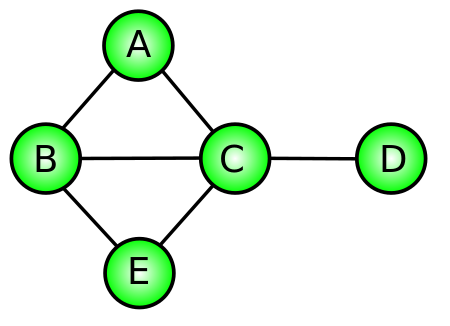

In [5]:
from IPython.display import Image

fig = Image(filename=('/coursedata/small_net_for_uw_centralities.png'))
fig

### b. Centrality measures (NetworkX)
Use NetworkX to compute all five centrality measures for the networks shown in Fig 2 (small_cayley_tree.edg, larger_lattice.edg, small_ring.edg) as well as for the Karate club network (karate_club_network_edge_file.edg). Then, visualize betweenness, closeness, k-shell, and eigenvector centrality as a function of degree in a scatter plot for each of the networks. For easier visual comparison of the measures, you should normalize the k-shell values by dividing them by the maximal k-shell value. 
**Hint**: For some of the networks, the power iteration algorithm used by NetworkX to calculate eigenvector centrality may not converge. In this case, increase the value of the tolerance (tol) parameter of `eigenvector_centrality()` until the iteration converges.

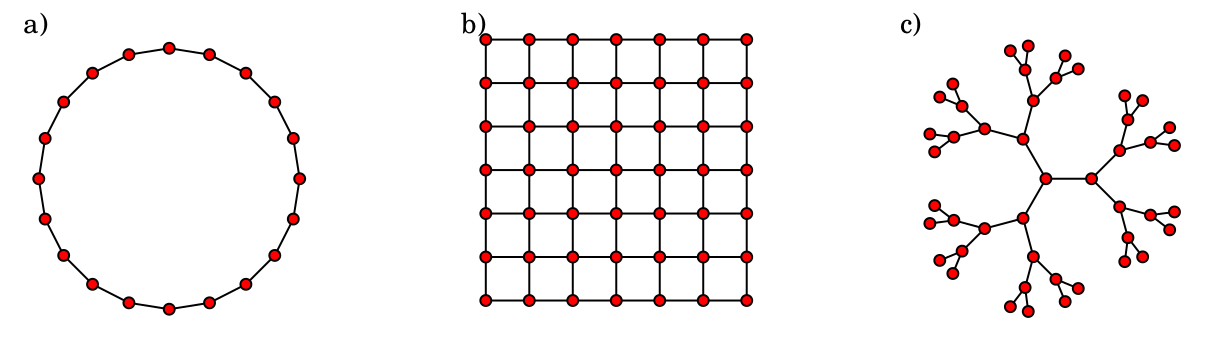

In [16]:
from IPython.display import Image

fig = Image(filename=('/coursedata/small_model_networks_larger_lattice.png'))
fig

In [32]:
import collections
def get_centrality_measures(network, tol):
    """
    Calculates five centrality measures (degree, betweenness, closeness, and
    eigenvector centrality, and k-shell) for the nodes of the given network.

    Parameters
    ----------
    network: networkx.Graph()
    tol: tolerance parameter for calculating eigenvector centrality

    Returns
    --------
    [degree, betweenness, closeness, eigenvector_centrality, kshell]: list of
    numpy.arrays
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    #TODO: Using networkX functions calculate the different centrality measures. Each of these networkx functions 
    #return a dictionary of nodes with the centrality measure of the nodes as the value.Then you should sort all 
    #the measures with same nodewise order as in network.nodes() and add them to their corresponding lists. Also
    #notice that at the end, get_centrality_measures() function should return a list of numpy arrays.
    
    #Tip: For k-shell centrality you can use e.g. nx.core_number function from networkx
    #print(collections.OrderedDict(sorted(nx.betweenness_centrality(network,normalized=True).items())))
    #print(sorted(network.degree(),key=network.degree().keys))
    
    
    degree=[]
    for idx, value in enumerate(network.degree()):
        print(value)
        degree.append(value[1])
        
    betweenness=[]
    for item in nx.betweenness_centrality(network,normalized=True).items():
        betweenness.append(item[1])
    
    closeness=[]
    for item in nx.closeness_centrality(network).items():
        closeness.append(item[1])
        
    eigenvector_centrality=[]
    for item in nx.eigenvector_centrality(network,tol=tol).items():
        eigenvector_centrality.append(item[1])
        
    kshell=[]
    for item in nx.core_number(network).items():
        kshell.append(item[1])
        
    return [np.asarray(degree), np.asarray(betweenness), np.asarray(closeness), np.asarray(eigenvector_centrality), np.asarray(kshell)]

In [33]:
# Set-up all the names
network_paths = ['small_ring.edg',
                 'larger_lattice.edg',
                 'small_cayley_tree.edg',
                 'karate_club_network_edge_file.edg']
coords_paths = ['small_ring_coords.pkl',
                'larger_lattice_coords.pkl',
                'small_cayley_tree_coords.pkl',
                'karate_club_coords.pkl']
network_names = ['ring', 'lattice', 'cayley_tree', 'karate']
x_label = 'Degree k'
y_label = 'Centrality measure'
labels = ['betweenness centrality', 'closeness centrality',
          'eigenvector centrality', 'normalized k-shell']
markers = ['.', 'x', '+', 'o']
scatter_base_path = './centrality_measures_scatter'
titles = ['Degree $k$', 'Betweenness centrality',
          'Closeness centrality', 'Eigenvector centrality', '$k$-shell']
network_base_path = './network_figures'

### c. Visualization
To highlight the differences between the centrality measures, **plot five visualizations** for each of the networks studied in part b (the ring lattice, the 2D-lattice, the Cayley tree and the Karate club network), each time using one of the centrality measures to define the colors of the network nodes. To make the visualization easier, coordinates of the nodes are provided in .pkl files (`small_cayley_tree_coords.pkl`, `larger_lattice_coords.pkl`, `small_ring_coords.pkl`, `karate_club_coords.pkl`).

In [34]:
tol = 10**-1 # tolerance parameter for calculating eigenvector centrality

for (network_path, network_name, coords_path) in zip(network_paths, network_names, coords_paths):
    complete_network_path = os.path.join(course_data_dir, network_path)
    complete_coords_path = os.path.join(course_data_dir, coords_path)
    if network_name == 'karate':
        network = nx.read_weighted_edgelist(complete_network_path)

    else:
        network = nx.read_edgelist(complete_network_path)
    
    # Calculating centrality measures
    [degree, betweenness, closeness, eigenvector_centrality, kshell] = get_centrality_measures(network, tol)
    kshell_normalized = kshell/float(np.max(kshell)) # normalization for easier visualization
    
    # Scatter plot
    y_values = [betweenness, closeness, eigenvector_centrality, kshell_normalized]
    scatter_path = scatter_base_path + '_' + network_name + '.png'
    fig = create_scatter(degree, y_values, x_label, y_label, labels, markers)
    fig.savefig(scatter_path)
    plt.close(fig)
    # Network figures  
    network_figure_path = network_base_path + '_' + network_name + '.png'
    all_cvalues = [degree, betweenness, closeness, eigenvector_centrality, kshell]
    fig=visualize_on_network(network, all_cvalues, complete_coords_path, titles)
    fig.savefig(network_figure_path)
    plt.close(fig)